## how to visualise gradient loss within deep NN layers

In [4]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import matplotlib.pyplot as plt

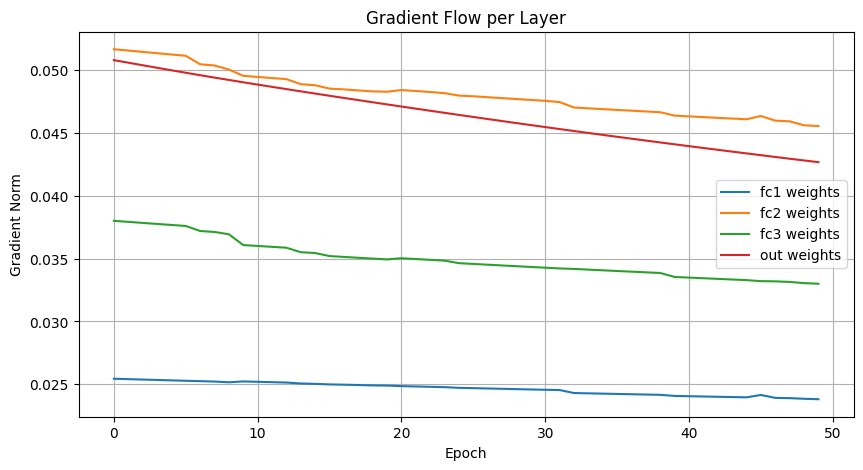

In [6]:
# Define your model
class DeepNet(nn.Module):
    def __init__(self):
        super().__init__()
        self.fc1 = nn.Linear(10, 64)
        self.fc2 = nn.Linear(64, 32)
        self.fc3 = nn.Linear(32, 16)
        self.out = nn.Linear(16, 1)
        
    def forward(self, x):
        x = F.relu(self.fc1(x))
        x = torch.tanh(self.fc2(x))
        x = F.leaky_relu(self.fc3(x))
        x = torch.sigmoid(self.out(x))
        return x

model = DeepNet()
optimizer = torch.optim.SGD(model.parameters(), lr=0.01)
criterion = nn.BCELoss()

# Dummy data
x = torch.randn(64, 10)
y = torch.randint(0, 2, (64, 1)).float()

# Store gradients
grad_norms = []

for epoch in range(50):
    optimizer.zero_grad()
    output = model(x)
    loss = criterion(output, y)
    loss.backward()

    # Record gradient norms
    layer_grad_norms = []
    for name, param in model.named_parameters():
        if "weight" in name:
            grad_norm = param.grad.norm().item()
            layer_grad_norms.append(grad_norm)
    grad_norms.append(layer_grad_norms)

    optimizer.step()

# Plot gradient norms
layer_names = ["fc1", "fc2", "fc3", "out"]
grad_norms = list(zip(*grad_norms))  # Transpose for plotting

plt.figure(figsize=(10, 5))
for i, grads in enumerate(grad_norms):
    plt.plot(grads, label=f"{layer_names[i]} weights")
plt.xlabel("Epoch")
plt.ylabel("Gradient Norm")
plt.title("Gradient Flow per Layer")
plt.legend()
plt.grid(True)
plt.show()


Things to look for:
- Healthy gradient flow: Lines stay above 0 but not too high.
- Vanishing gradients: Lines drop toward zero — usually happens with many sigmoid or tanh layers.
- Exploding gradients: Lines shoot up rapidly — often in deep networks without normalization or regularization.